In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = 'HumanResources.csv'
hr_data = pd.read_csv(file_path, sep=';')

In [2]:
hr_data.head()

Employee_ID First Name Last Name  Gender           State           City  \
0  00-95822412   Danielle   Johnson  Female        New York  New York City   
1  00-42868828       John    Taylor    Male  North Carolina      Charlotte   
2  00-83197857      Erica   Mcclain    Male        New York  New York City   
3  00-13999315   Brittany   Johnson    Male        New York  New York City   
4  00-90801586    Jeffery    Wagner  Female        New York  New York City   

  Education Level   Birthdate    Hiredate    Termdate        Department  \
0     High School  13/02/1980  16/04/2016  05/07/2021  Customer Service   
1        Bachelor  22/09/1987  09/02/2017  14/06/2019                IT   
2        Bachelor  19/05/1994  03/02/2016  06/03/2021        Operations   
3        Bachelor  18/04/1980  06/02/2016  06/11/2018        Operations   
4        Bachelor  07/04/1985  11/01/2015         NaN        Operations   

               Job Title  Salary Performance Rating  
0   Help Desk Technician   81552  Needs Improvement  
1   System Administrator  107520               Good  
2  Logistics Coordinator   61104               Good  
3   Inventory Specialist   73770               Good  
4     Operations Analyst   55581       Satisfactory

In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         8950 non-null   object
 1   First Name          8950 non-null   object
 2   Last Name           8950 non-null   object
 3   Gender              8950 non-null   object
 4   State               8950 non-null   object
 5   City                8950 non-null   object
 6   Education Level     8950 non-null   object
 7   Birthdate           8950 non-null   object
 8   Hiredate            8950 non-null   object
 9   Termdate            966 non-null    object
 10  Department          8950 non-null   object
 11  Job Title           8950 non-null   object
 12  Salary              8950 non-null   int64 
 13  Performance Rating  8950 non-null   object
dtypes: int64(1), object(13)
memory usage: 979.0+ KB


In [4]:
# Convert Hiredate to datetime
hr_data['Hiredate'] = pd.to_datetime(hr_data['Hiredate'])

# Replace blank Termdate with NaT to correctly represent currently employed individuals
hr_data['Termdate'] = pd.to_datetime(hr_data['Termdate'], errors='coerce')

C:\Users\KAILASH\AppData\Local\Temp\ipykernel_28604\2709576719.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hr_data['Hiredate'] = pd.to_datetime(hr_data['Hiredate'])
C:\Users\KAILASH\AppData\Local\Temp\ipykernel_28604\2709576719.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hr_data['Termdate'] = pd.to_datetime(hr_data['Termdate'], errors='coerce')


In [5]:
# Check for null values
null_values = hr_data.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Employee_ID              0
First Name               0
Last Name                0
Gender                   0
State                    0
City                     0
Education Level          0
Birthdate                0
Hiredate                 0
Termdate              7984
Department               0
Job Title                0
Salary                   0
Performance Rating       0
dtype: int64


In [6]:
# We leave the Termdate values as NaT for currently employed individuals
# This allows us to easily identify and differentiate between active and terminated employees
current_date = datetime.now()
hr_data['Employment Duration'] = (hr_data['Termdate'].fillna(current_date) - hr_data['Hiredate']).dt.days

In [7]:
# Basic statistics for numerical columns
basic_stats = hr_data.describe()
print("\nBasic Statistics for Numerical Columns:")
print(basic_stats)


Basic Statistics for Numerical Columns:
              Salary  Employment Duration
count    8950.000000          8950.000000
mean    70964.213520          1508.081788
std     13763.126237          1043.716971
min     51835.000000          -148.000000
25%     60920.500000           503.000000
50%     66592.500000          1520.000000
75%     78600.500000          2476.000000
max    149377.000000          3502.000000



Gender Distribution Across Departments:
Gender            Female  Male
Department                    
Customer Service     779   894
Finance              210   242
HR                    94    78
IT                   601   781
Marketing            352   366
Operations          1250  1468
Sales                863   972


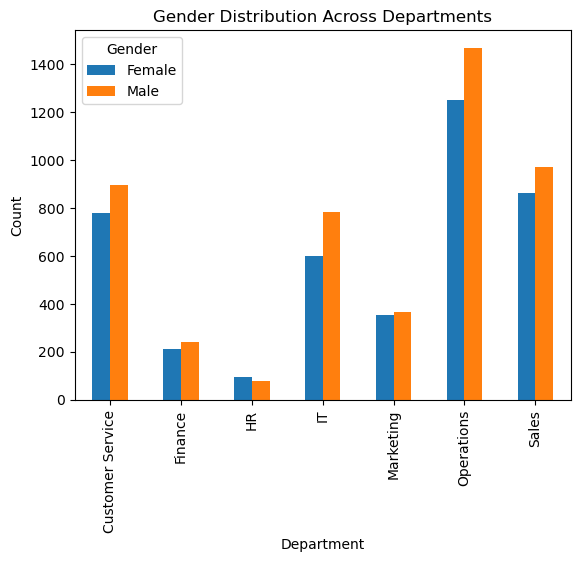

In [8]:
# Gender distribution across different departments
gender_distribution = hr_data.groupby(['Department', 'Gender']).size().unstack().fillna(0)
print("\nGender Distribution Across Departments:")
print(gender_distribution)

# Plot gender distribution across departments
gender_distribution.plot(kind='bar', stacked=False)
plt.title('Gender Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


Distribution of Education Levels Across Genders:
Gender           Female  Male
Education Level              
Bachelor           2489  2927
High School         855   964
Master              572   665
PhD                 233   245


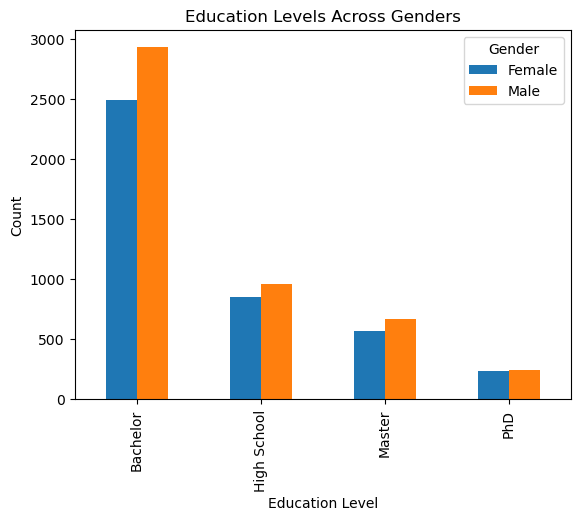

In [9]:
# Distribution of employees' education levels across genders
education_gender_distribution = hr_data.groupby(['Education Level', 'Gender']).size().unstack().fillna(0)
print("\nDistribution of Education Levels Across Genders:")
print(education_gender_distribution)

# Plot distribution of education levels across genders
education_gender_distribution.plot(kind='bar', stacked=False)
plt.title('Education Levels Across Genders')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


State with Highest Number of Employees: New York


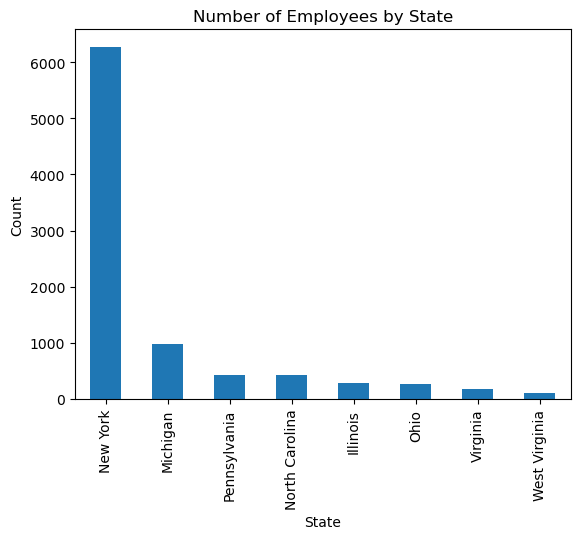

In [10]:
# State with the highest number of employees
state_with_most_employees = hr_data['State'].value_counts().idxmax()
print("\nState with Highest Number of Employees:", state_with_most_employees)

# Plot number of employees by state
state_counts = hr_data['State'].value_counts()
state_counts.plot(kind='bar')
plt.title('Number of Employees by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


Job Titles with Highest Average Performance Ratings:
Job Title
IT Manager                         3.392857
Sales Manager                      3.019231
Financial Analyst                  3.018634
Finance Manager                    3.000000
Sales Consultant                   2.993724
Operations Manager                 2.982143
Customer Service Manager           2.972973
Sales Specialist                   2.959292
HR Coordinator                     2.892857
Operations Analyst                 2.888689
Marketing Manager                  2.862069
System Administrator               2.857143
Software Developer                 2.814992
Marketing Coordinator              2.703883
Logistics Coordinator              2.691800
Accountant                         2.664740
Sales Representative               2.660811
Accounts Payable Specialist        2.614679
HR Assistant                       2.566667
Recruiter                          2.529412
Support Specialist                 2.468750
Content Crea

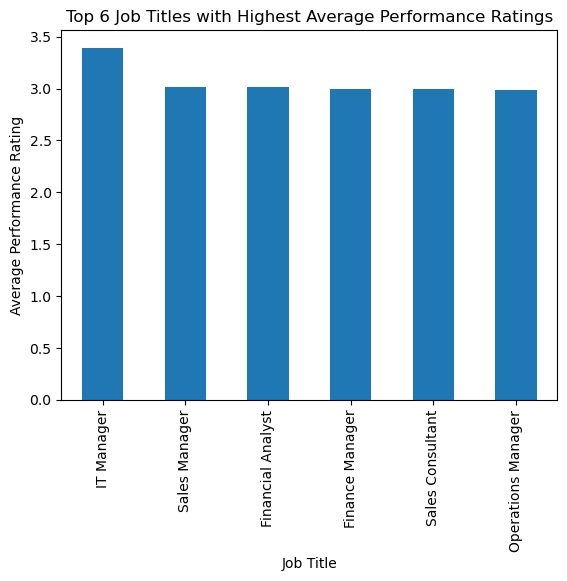

In [11]:
# Job titles associated with the highest average performance ratings
performance_ratings = {'Needs Improvement': 1, 'Satisfactory': 2, 'Good': 3, 'Excellent': 4}
hr_data['Performance Rating Numeric'] = hr_data['Performance Rating'].map(performance_ratings)
job_performance = hr_data.groupby('Job Title')['Performance Rating Numeric'].mean().sort_values(ascending=False)
print("\nJob Titles with Highest Average Performance Ratings:")
print(job_performance)

top_6_jobs = job_performance.head(6)
# Plot job titles with highest average performance ratings
top_6_jobs.plot(kind='bar')
plt.title('Top 6 Job Titles with Highest Average Performance Ratings')
plt.xlabel('Job Title')
plt.ylabel('Average Performance Rating')
plt.show()


Salary Distribution Across Departments:
                   count          mean           std      min       25%  \
Department                                                                
Customer Service  1673.0  65837.728631   9646.766458  51835.0  59362.00   
Finance            452.0  76451.143805  15850.693349  51887.0  64458.75   
HR                 172.0  64145.034884   6000.083492  52401.0  59367.50   
IT                1382.0  81925.607815  17208.153437  52103.0  64625.25   
Marketing          718.0  67659.023677  10734.932549  51887.0  59887.75   
Operations        2718.0  65400.250184   9256.897435  52138.0  59506.50   
Sales             1835.0  76204.947684  13243.989129  51865.0  66196.50   

                      50%       75%       max  
Department                                     
Customer Service  63314.0  69524.00  104359.0  
Finance           72963.5  86385.00  149377.0  
HR                64034.5  68401.75   82203.0  
IT                83865.0  95084.75  133425

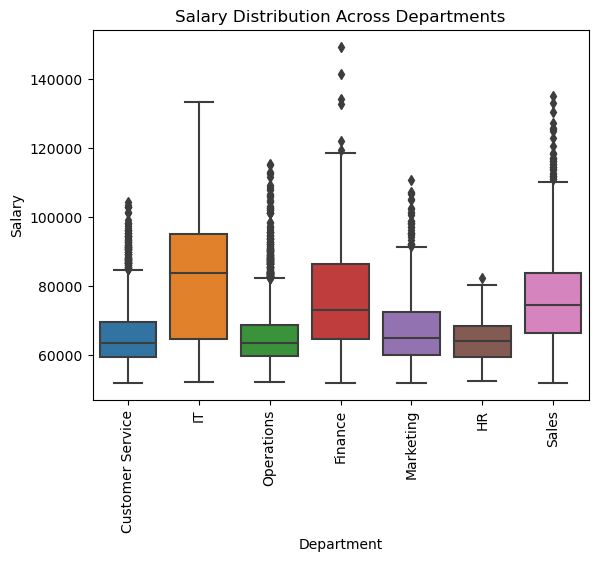

In [12]:
# Salary distribution between different departments
salary_distribution = hr_data.groupby('Department')['Salary'].describe()
print("\nSalary Distribution Across Departments:")
print(salary_distribution)

# Plot salary distribution across departments
sns.boxplot(x='Department', y='Salary', data=hr_data)
plt.title('Salary Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


Average Employment Duration for Employees in Each Department:
Department
Customer Service    1492.368799
Finance             1482.918142
HR                  1411.627907
IT                  1528.535456
Marketing           1498.062674
Operations          1501.569169
Sales               1535.809264
Name: Employment Duration, dtype: float64


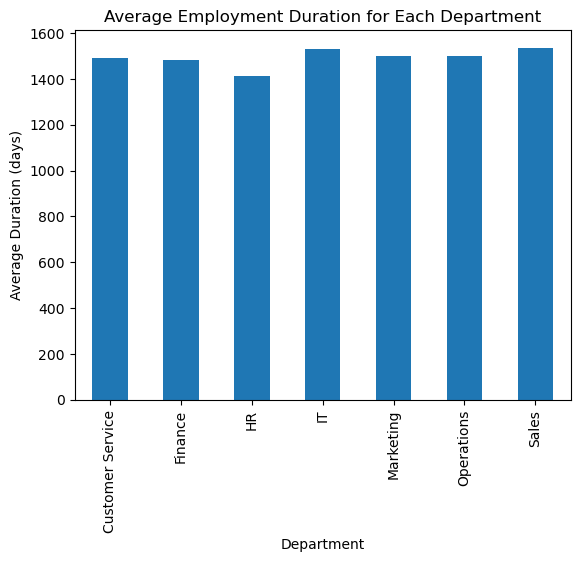

In [13]:
# Average employment duration for employees in each department
average_employment_duration = hr_data.groupby('Department')['Employment Duration'].mean()
print("\nAverage Employment Duration for Employees in Each Department:")
print(average_employment_duration)

# Plot average employment duration for each department
average_employment_duration.plot(kind='bar')
plt.title('Average Employment Duration for Each Department')
plt.xlabel('Department')
plt.ylabel('Average Duration (days)')
plt.show()



Average Salaries for Different Job Titles:
Job Title
Finance Manager                    125143.000000
IT Manager                         113906.821429
Sales Manager                      103795.500000
Operations Manager                  96937.160714
Marketing Manager                   95955.793103
Software Developer                  93414.023923
Financial Analyst                   86409.354037
Sales Consultant                    86075.500000
System Administrator                85466.807143
Customer Service Manager            84782.662162
HR Manager                          82203.000000
Sales Specialist                    75045.182301
Operations Analyst                  73674.849192
Accountant                          73457.312139
SEO Specialist                      73271.651429
Help Desk Technician                72426.079918
Sales Representative                68775.805405
Marketing Coordinator               68490.966019
Recruiter                           66001.494118
Logistics Coord

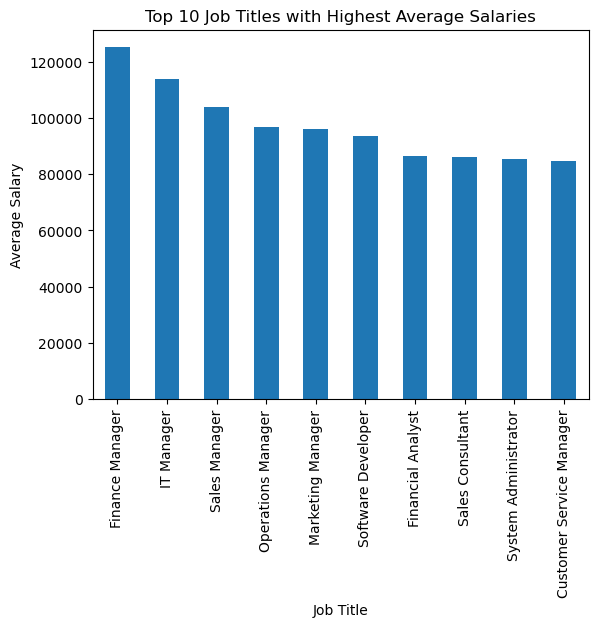

In [14]:
# Average salaries for different job titles
average_salaries_by_job = hr_data.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)
print("\nAverage Salaries for Different Job Titles:")
print(average_salaries_by_job)

top_10_salaries = average_salaries_by_job.nlargest(10)
# Plot top 10 job titles with highest average salaries
top_10_salaries.plot(kind='bar')
plt.title('Top 10 Job Titles with Highest Average Salaries')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()


Average Salaries Education Level:
Education Level
PhD            86033.196653
Master         82675.957154
Bachelor       69921.570532
High School    62144.286971
Name: Salary, dtype: float64


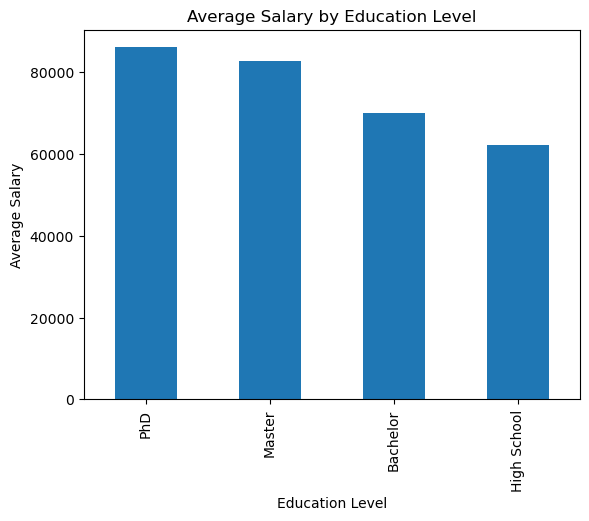

In [15]:
# Average Salary by education level
average_salaries_by_education = hr_data.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)
print("\nAverage Salaries Education Level:")
print(average_salaries_by_education)

average_salaries_by_education.plot(kind='bar')
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()

In [16]:
# Frequency of employees receiving 'Excellent' performance ratings in their tenure
excellent_ratings_frequency = hr_data[hr_data['Performance Rating'] == 'Excellent'].groupby(['Department', 'Job Title']).size()
print("\nFrequency of Employees Receiving 'Excellent' Performance Ratings:")
print(excellent_ratings_frequency)


Frequency of Employees Receiving 'Excellent' Performance Ratings:
Department        Job Title                      
Customer Service  Customer Service Manager            23
                  Customer Service Representative     55
                  Help Desk Technician                58
                  Support Specialist                  92
Finance           Accountant                          26
                  Accounts Payable Specialist         12
                  Finance Manager                      3
                  Financial Analyst                   55
HR                HR Assistant                         3
                  HR Coordinator                      14
                  Recruiter                           13
IT                IT Manager                          15
                  IT Support Specialist               52
                  Software Developer                 126
                  System Administrator                68
Marketing         Content Cr